# Image Classification

In [1]:
import pandas as pd
import numpy as np

import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import seaborn as sns

import os,sys

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(f'Num GPUs available: {len(physical_devices)}')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs available: 1


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [5]:
labels = {'0':'T-shirt/top', '1':'Trouser','2':'Pullover','3':'Dress','4':'Coat','5':'Sandal','6':'Shirt','7':'Sneaker','8':'Bag','9':'Ankle boot'}

In [6]:
labels['0']

'T-shirt/top'

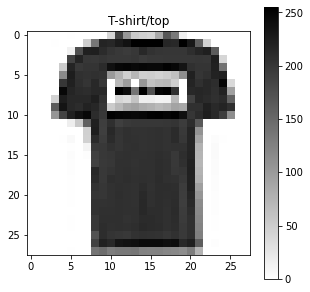

In [7]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[1,:,:],cmap=plt.cm.binary)
plt.title(labels[str(y_train[1])])
plt.colorbar()
plt.show()

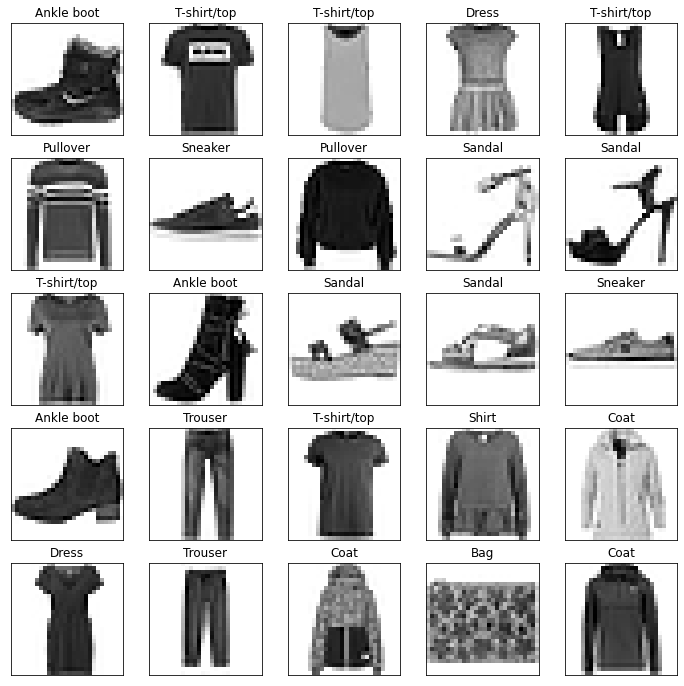

In [8]:
plt.figure(figsize=(12,12))

for i, (image,code) in enumerate(zip(x_train,y_train)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.title(labels[str(y_train[i])])
  if i==24:
    break


In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train_flatten = x_train.reshape(60000,-1)
x_test_flatten = x_test.reshape(len(x_test),-1)
x_train_flatten.shape, x_test_flatten.shape

((60000, 784), (10000, 784))

In [11]:
model = keras.Sequential([
              keras.layers.Dense(units=128, input_shape=(784,), activation='relu'),
              keras.layers.Dense(units=80, input_shape=(784,), activation='relu'),
              keras.layers.Dense(units=10, activation='softmax')
])

In [12]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 80)                10320     
                                                                 
 dense_2 (Dense)             (None, 10)                810       
                                                                 
Total params: 111,610
Trainable params: 111,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(x_train_flatten,y_train,epochs=10,batch_size=64,shuffle=True)

Epoch 1/10
938/938 [==============================] - 7s 4ms/step - loss: 0.5116 - accuracy: 0.8201
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3694 - accuracy: 0.8665
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3345 - accuracy: 0.8763
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3116 - accuracy: 0.8857
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2921 - accuracy: 0.8914
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2780 - accuracy: 0.8974
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2676 - accuracy: 0.9001
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2566 - accuracy: 0.9040
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2476 - accuracy: 0.9065
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2370 - accuracy: 0.9107

In [15]:
test_loss, test_accuracy = model.evaluate(x_test_flatten,y_test)
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3285 - accuracy: 0.8852
Accuracy on test dataset: 0.885200023651123


In [16]:
np.argmax(model.predict(x_test_flatten[2:3,:]))

1

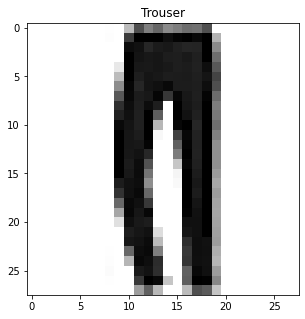

In [17]:
plt.figure(figsize=(5,5))
plt.imshow(x_test[2,:,:],cmap=plt.cm.binary)
plt.title(labels[str(1)])
plt.show()

In [18]:
y_predictions = model.predict(x_test_flatten)

In [19]:
y_predictions_label = [np.argmax(i) for i in y_predictions]

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predictions_label)

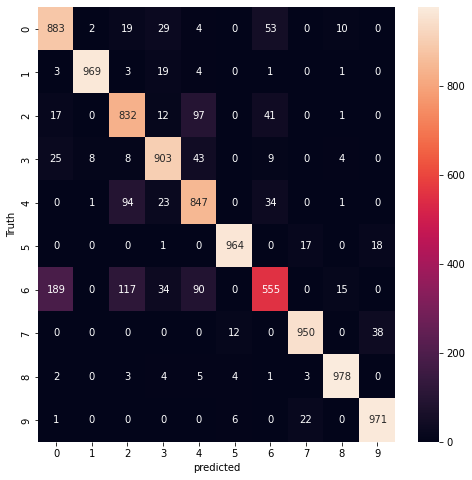

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d');
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

In [22]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, _ = score(y_test, y_predictions_label, average='weighted')

In [23]:
precision, recall, fscore

(0.885729221164229, 0.8852, 0.8826791443178001)

# Regression Problem

In [24]:
print(tf.__version__)

2.7.0


In [25]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [26]:
raw_dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [27]:
raw_dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [28]:
data = raw_dataset.dropna()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [30]:
data['Origin'] = data['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
data = pd.get_dummies(data, columns=['Origin'], prefix='', prefix_sep='')
data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


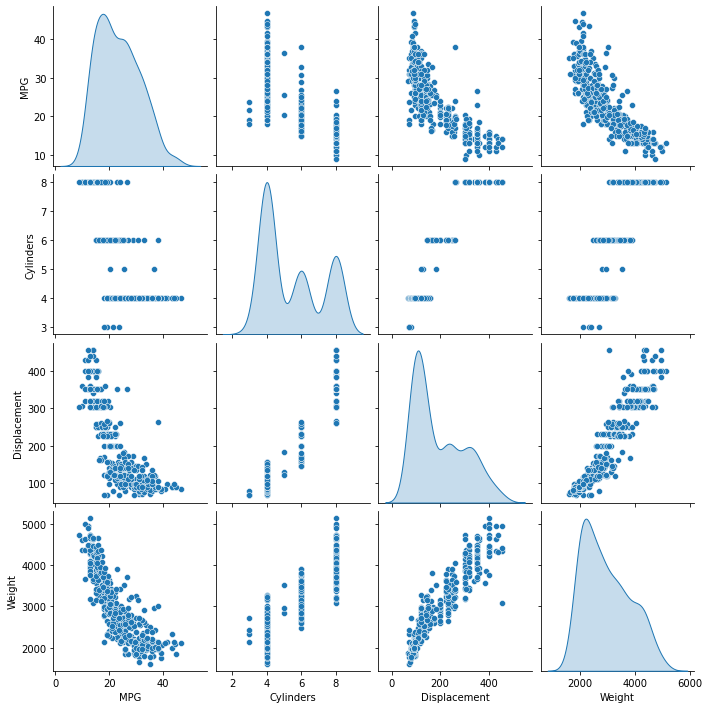

In [32]:
sns.pairplot(data[['MPG', 'Cylinders', 'Displacement', 'Weight']],diag_kind='kde')

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Europe,392.0,0.173469,0.379136,0.0,0.000,0.00,0.000,1.0
Japan,392.0,0.201531,0.401656,0.0,0.000,0.00,0.000,1.0
USA,392.0,0.625000,0.484742,0.0,0.000,1.00,1.000,1.0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y, X = data['MPG'], data.drop(columns='MPG')


scaler = StandardScaler()
X_transfrom = scaler.fit_transform(X)

X_transfrom = pd.DataFrame(X_transfrom,columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_transfrom, y, test_size=0.2, random_state=42)

In [35]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Cylinders,313.0,0.006157,0.998145,-1.451004,-0.864014,-0.864014,1.483947,1.483947
Displacement,313.0,0.010579,0.992882,-1.190426,-0.855532,-0.415384,1.029447,2.493416
Horsepower,313.0,0.003248,0.995880,-1.520975,-0.740580,-0.246329,0.638120,3.265452
Weight,313.0,0.010067,0.991531,-1.608575,-0.876539,-0.144503,0.786752,2.549061
Acceleration,313.0,0.001003,1.022691,-2.736983,-0.740861,-0.014999,0.638278,3.360262
Model Year,313.0,0.061993,0.986709,-1.625315,-0.809884,0.005547,0.820978,1.636410
Europe,313.0,-0.053122,0.953132,-0.458123,-0.458123,-0.458123,-0.458123,2.182821
Japan,313.0,-0.000630,1.001132,-0.502390,-0.502390,-0.502390,-0.502390,1.990484
USA,313.0,0.042071,0.989765,-1.290994,-1.290994,0.774597,0.774597,0.774597


In [36]:
model_reg = keras.Sequential([
              keras.layers.Dense(units=64, input_shape=(9,),activation='relu'),
              keras.layers.Dense(units=64,activation='relu'),
              keras.layers.Dense(units=1),
])

In [37]:
model_reg.compile(optimizer='Adam', loss='mse',metrics=['mae'])

In [38]:
model_reg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [39]:
callbacks = [EarlyStopping(patience=10, monitor="val_loss")]

history = model_reg.fit(X_train, y_train, epochs=1000,batch_size=64,validation_split=0.2, verbose=1,callbacks=callbacks)

Epoch 1/1000
4/4 [==============================] - 0s 45ms/step - loss: 607.5824 - mae: 23.3316 - val_loss: 680.6684 - val_mae: 24.8943
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 590.7937 - mae: 22.9701 - val_loss: 662.8825 - val_mae: 24.5405
Epoch 3/1000
4/4 [==============================] - 0s 9ms/step - loss: 574.2831 - mae: 22.6120 - val_loss: 645.4338 - val_mae: 24.1894
Epoch 4/1000
4/4 [==============================] - 0s 9ms/step - loss: 557.3923 - mae: 22.2440 - val_loss: 627.5048 - val_mae: 23.8215
Epoch 5/1000
4/4 [==============================] - 0s 8ms/step - loss: 540.2394 - mae: 21.8566 - val_loss: 608.3176 - val_mae: 23.4192
Epoch 6/1000
4/4 [==============================] - 0s 8ms/step - loss: 521.4485 - mae: 21.4267 - val_loss: 587.2975 - val_mae: 22.9672
Epoch 7/1000
4/4 [==============================] - 0s 8ms/step - loss: 501.2540 - mae: 20.9431 - val_loss: 564.2226 - val_mae: 22.4607
Epoch 8/1000
4/4 [=============================

In [40]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
218,6.381569,1.809939,6.546785,1.880402,218
219,6.388298,1.812967,6.493346,1.873474,219
220,6.364670,1.808997,6.489328,1.875234,220
221,6.357862,1.807868,6.459404,1.869837,221
222,6.350078,1.806395,6.453713,1.870324,222


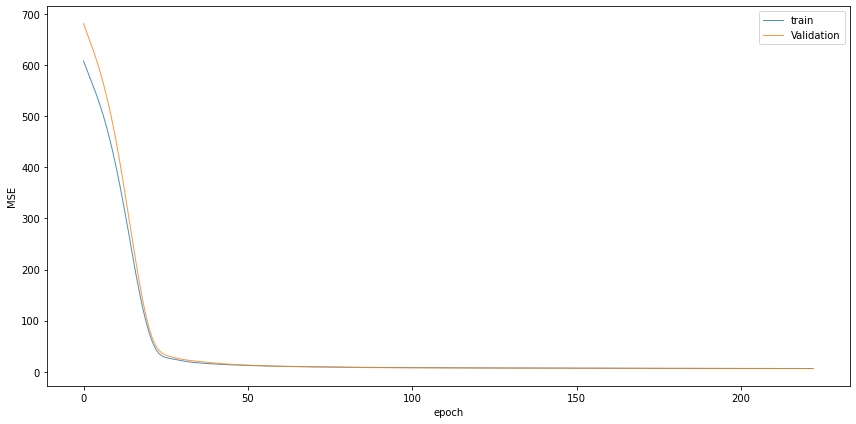

In [41]:
plt.figure(figsize=(12,6))

# plt.subplot(1,2,1)

plt.plot(history.history["loss"], linewidth=1, alpha=0.8, label="train")
plt.plot(history.history["val_loss"], linewidth=1, alpha=0.8, label="Validation")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.legend()

# plt.subplot(1,2,2)

# plt.plot(history.history["mse"], linewidth=1, alpha=0.8, label="train")
# plt.plot(history.history["val_mse"], linewidth=1, alpha=0.8, label="cv")
# plt.xlabel("epoch")
# plt.ylabel("RMSE")

plt.tight_layout()